# Encontro 15
## Teste de hipóteses para comparação de duas médias populacionais

**Preparo Prévio:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Comparação de duas médias populacionais (Seção 9.1 e 9.2).

**Hoje:**
1.	Teste de hipóteses para duas médias populacionais
2.	Uso da base de dados da PNAD (mesma do Projeto 1)
3.	Fechamento do conteúdo.

In [30]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.stats import ttest_ind
import math
import random

print("Esperamos trabalhar no diretório")
print(os.getcwd())


Esperamos trabalhar no diretório
C:\Users\mathe_000\Desktop\INSPER\2015-2\Ciência dos Dados


In [8]:
dados = pd.read_csv('pes2013P1.csv', sep=',')

In [9]:
dados.head()

,Unnamed: 0,UF,V0302,V8005,V0402,V0404,V9001,V9005,V9029,V9032,V9042,V9611,V4803,V4707,V4745,V4718
0,1,11,4,42,1,2,3,NaN,NaN,NaN,NaN,NaN,6,NaN,2,NaN
1,2,11,4,64,1,8,3,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN
2,3,11,4,13,4,4,3,NaN,NaN,NaN,NaN,NaN,6,NaN,2,NaN
3,4,11,2,23,1,8,1,1,1,2,2,0,1,3,1,800
4,5,11,4,19,4,8,3,NaN,NaN,NaN,NaN,NaN,12,NaN,5,NaN


In [10]:
dados.shape

(362555, 16)

___
Para estabelecer um pouco de homogeneidade, considere apenas os indivíduos que:

1. trabalhavam habitualmente entre 40 a 44 horas semanais (V4707==3),
2. entre 10 e 20 anos no trabalho principal (V9611>=10 e V9611<=20),
3. trabalhavam na semana de referência (V9001==1),
4. com apenas um emprego (V9005==1), 
5. carteira assinada (V9032==2), 
6. no setor Privado (V9032==4),
7. com ocupação de “empregado” no trabalho principal (V9029==1), 
8. considerado ser a “pessoa de referência” da família (V0402==1), 
9. com renda do trabalho principal declarada (V4718<9999999999), e 
10. com ensino superior completo (V4745==7).


In [11]:
b = dados[(dados.V4707==3) & (dados.V9611>=10) & (dados.V9611<=20) & (dados.V9001==1) & (dados.V9005==1) & (dados.V0402==1) & (dados.V9042==2) & (dados.V9032==4) & (dados.V9029==1) & (dados.V4718<9999999999) & (dados.V4745==7)]

In [12]:
b = b.copy()
# Vamos fazer o índice recomeçar em 1 porque isso facilita a troca de dados com o numpy
b.index = pd.Series(range(len(b)))
b.shape

(94, 16)

In [13]:
b

,Unnamed: 0,UF,V0302,V8005,V0402,V0404,V9001,V9005,V9029,V9032,V9042,V9611,V4803,V4707,V4745,V4718
0,8000,12,2,43,1,8,1,1,1,4,2,20,16,3,7,1440
1,8770,12,2,35,1,2,1,1,1,4,2,18,16,3,7,2000
2,18354,13,2,51,1,4,1,1,1,4,2,11,16,3,7,10000
3,53925,17,2,33,1,8,1,1,1,4,2,12,16,3,7,3500
4,66355,21,2,30,1,4,1,1,1,4,2,13,16,3,7,2900
5,70243,22,2,37,1,8,1,1,1,4,2,11,16,3,7,2000
6,85049,23,4,48,1,2,1,1,1,4,2,15,16,3,7,1400
7,85790,23,4,36,1,2,1,1,1,4,2,13,15,3,7,715
8,101346,25,2,52,1,2,1,1,1,4,2,15,16,3,7,6000
9,101392,25,2,60,1,8,1,1,1,4,2,20,16,3,7,5000


In [14]:
b.V4718.describe()

count       94.000000
mean      4635.659574
std       3865.544195
min        678.000000
25%       1985.000000
50%       3350.000000
75%       6000.000000
max      21000.000000
Name: V4718, dtype: float64

In [15]:
#Gênero
#b.V0302 == 2 ==> 'Masculino'
#b.V0302 == 4 ==> 'Feminino'
b.V0302.value_counts()


2    48
4    46
dtype: int64

In [16]:
salA = np.array(b.V4718[b.V0302==2])
nA = len(salA)
xbarra_A = np.mean(salA)
desvpad_A = np.std(salA,ddof=1)
print(nA)
print(xbarra_A)
print(desvpad_A)

48
5130.72916667
4095.03409561


In [17]:
salB = np.array(b.V4718[b.V0302==4])
nB = len(salB)
xbarra_B = np.mean(salB)
desvpad_B = np.std(salB,ddof=1)
print(nB)
print(xbarra_B)
print(desvpad_B)

46
4119.06521739
3582.20402299


## Atividades

### 1. Bootstrap para diferença de médias
Calcule um intervalo de confiança de 95% para a diferença entre as médias salariais de homens e mulheres


### 2. Teste de permutação para diferença salarial
Qual a probabilidade de, caso não haja discriminação, observarmos a diferença salarial entre homens e mulheres presente na população?

Para fazer isso, assuma que não há diferença salarial.

Assumir que não há diferença salarial quer dizer que os salários são independentes de sexo, ou seja, permutamos os salários, recolocamos no *dataframe* e não esperamos que a média mude.

<font color=red>
### Atenção

Esta atividade pode ser feita em duplas.

Trios serão permitidos, mas terão que fazer o bootstrap e a permutação também para investigar se há ou não evidências de discriminação racial (negros x restante da população)

</font>

In [28]:
def bootstrap(ex,ex1, p):
    dados = np.array(ex)
    n = len(dados)
    dados1 = np.array(ex1)
    n1 = len(dados1)
    p1 = ((((p/2)-50)**2)**1/2)
    p2 = (p/2)+50

    medias_amostrais = []

    num_vezes = 10000

    for i in range(num_vezes):
        # Gera uma reamostra dos dados _com_ reposição
        amostra = np.random.choice(dados, size=n, replace=True)
        media = np.mean(amostra)
        amostra1 = np.random.choice(dados1, size=n1, replace=True)
        media1 = np.mean(amostra1)
        media2 = media1 - media
        medias_amostrais.append(media2)


    bins = np.linspace(min(medias_amostrais), max(medias_amostrais), 50)
    pd.DataFrame.plot(kind='hist', data=pd.Series(medias_amostrais), bins=bins, normed=True, legend=False)
    a = np.percentile(medias_amostrais, p1)
    b = np.percentile(medias_amostrais, p2)
    print('intervalo de confianca bootstrap:')
    print(a,'a',b)

intervalo de confianca bootstrap:
-2467.06714221 a 535.62339221


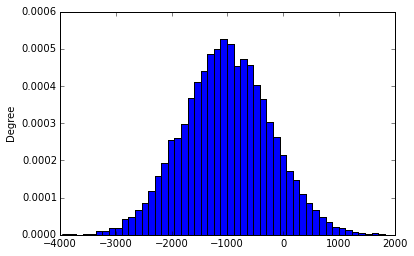

In [29]:
bootstrap(salA,salB,95)

In [53]:
def permut(ex,ex1):
    dobs = np.mean(ex) - np.mean(ex1)
    print("A diferença das médias observada entre Homens e Mulheres: %f" % dobs)
    
    nA = len(ex)
    nB = len(ex1)
    
    ex = list(ex)
    ex1 = list(ex1)
    
    #juntar as duas listas
    xAB = ex + ex1

    #número de permutações, o ideal seria (m+n)! mas seria inviável.
    t = 100000

    perm = []
    for i in range(0,t):
        #Embaralha o xy
        random.shuffle(xAB)
        #calcula a dif de medias entre o x e o y embaralhado e separado
        perm.append(np.mean(xAB[nB:]) - np.mean(xAB[0:nB]))

    #Transforma a lista em série do pandas
    perm = pd.Series(perm)

    #plota o histograma
    pd.DataFrame.plot(kind='hist', data=perm, normed=True, legend=False)

    #Permutação:
    pvalue_perm = 2*(perm[perm > dobs]).count()/perm.count()

    print("P-value através do teste de permutação: %f" % pvalue_perm)

A diferença das médias observada entre Homens e Mulheres: 1011.663949
P-value através do teste de permutação: 0.209020


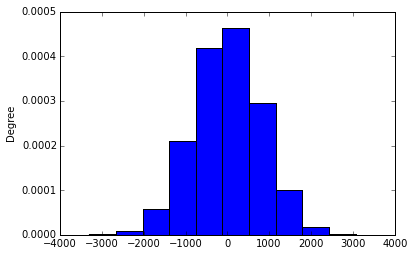

In [54]:
permut(salA,salB)

Assumindo alpha = 0.05;
Não pode-se afirmar a partir da amostra que há discriminação salarial